In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# def get_image_array(path):
#     folders = os.listdir(path)
#     images = []
#     labels = []
    
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
#     for folder in folders:
#         newPath = path + '/' + folder
#         image_list = os.listdir(newPath)
        
#         for img in image_list:
#             img = cv2.imread(newPath + '/' + img,0)
            
#             faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
            
#             for (x, y, w, h) in faces:
#                 # Crop and resize the detected face
#                 face = img[y:y+h, x:x+w]
#                 face = cv2.resize(face, (100, 100))

#                 images.append(face)
#                 labels.append(folder)
    
#     images = np.array(images)
#     labels = np.array(labels).reshape(-1, 1)
    
#     return images, labels

In [3]:
def get_image_array(path):
    folders = os.listdir(path)
    images = []
    labels = []
    for folder in folders:
        newPath = path + '/' + folder
        image_list = os.listdir(newPath)
        for img in image_list:
            img = cv2.imread(newPath + '/' + img,0)
            img = cv2.resize(img, (100, 100))
            images.append(img)
            labels.append(folder)
    
    images = np.array(images)
    labels = np.array(labels).reshape(-1, 1)
    
    return images, labels

In [4]:
train_images, train_labels = get_image_array('D:/Suchi NMIMS/Year 3/Sem 5/FOML/ExpressionImages/images/train')
print(train_images.shape)

(28965, 100, 100)


In [5]:
test_images, test_labels = get_image_array('D:/Suchi NMIMS/Year 3/Sem 5/FOML/ExpressionImages/images/validation')
print(test_images.shape)

(7066, 100, 100)


In [6]:
print(train_labels.shape, test_labels.shape)

(28965, 1) (7066, 1)


In [7]:
train_images

array([[[ 72,  73,  76, ...,  42,  41,  40],
        [ 70,  71,  73, ...,  44,  42,  41],
        [ 67,  67,  67, ...,  47,  45,  43],
        ...,
        [ 76,  77,  77, ...,  73,  62,  57],
        [ 77,  76,  76, ...,  92,  79,  74],
        [ 77,  76,  75, ..., 100,  88,  82]],

       [[152, 151, 150, ..., 133, 125, 121],
        [151, 151, 150, ..., 135, 128, 124],
        [150, 150, 151, ..., 140, 133, 131],
        ...,
        [187, 187, 188, ..., 183, 186, 187],
        [186, 186, 186, ..., 182, 183, 184],
        [186, 186, 185, ..., 181, 182, 183]],

       [[ 29,  28,  26, ...,  43,  39,  37],
        [ 29,  28,  26, ...,  41,  39,  38],
        [ 30,  29,  26, ...,  39,  39,  39],
        ...,
        [ 31,  30,  30, ..., 164, 166, 167],
        [ 31,  31,  30, ..., 170, 171, 172],
        [ 32,  31,  30, ..., 173, 174, 174]],

       ...,

       [[253, 253, 253, ..., 224, 227, 228],
        [254, 254, 254, ..., 226, 228, 232],
        [254, 254, 254, ..., 226, 228, 232

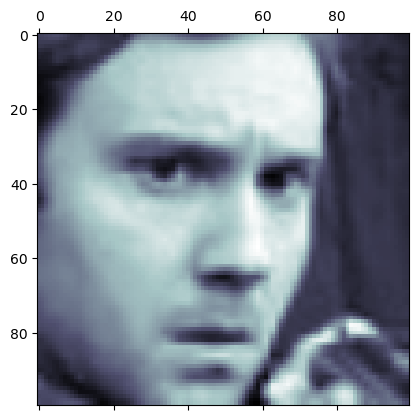

In [8]:
plt.matshow(train_images[0], cmap = plt.cm.bone)

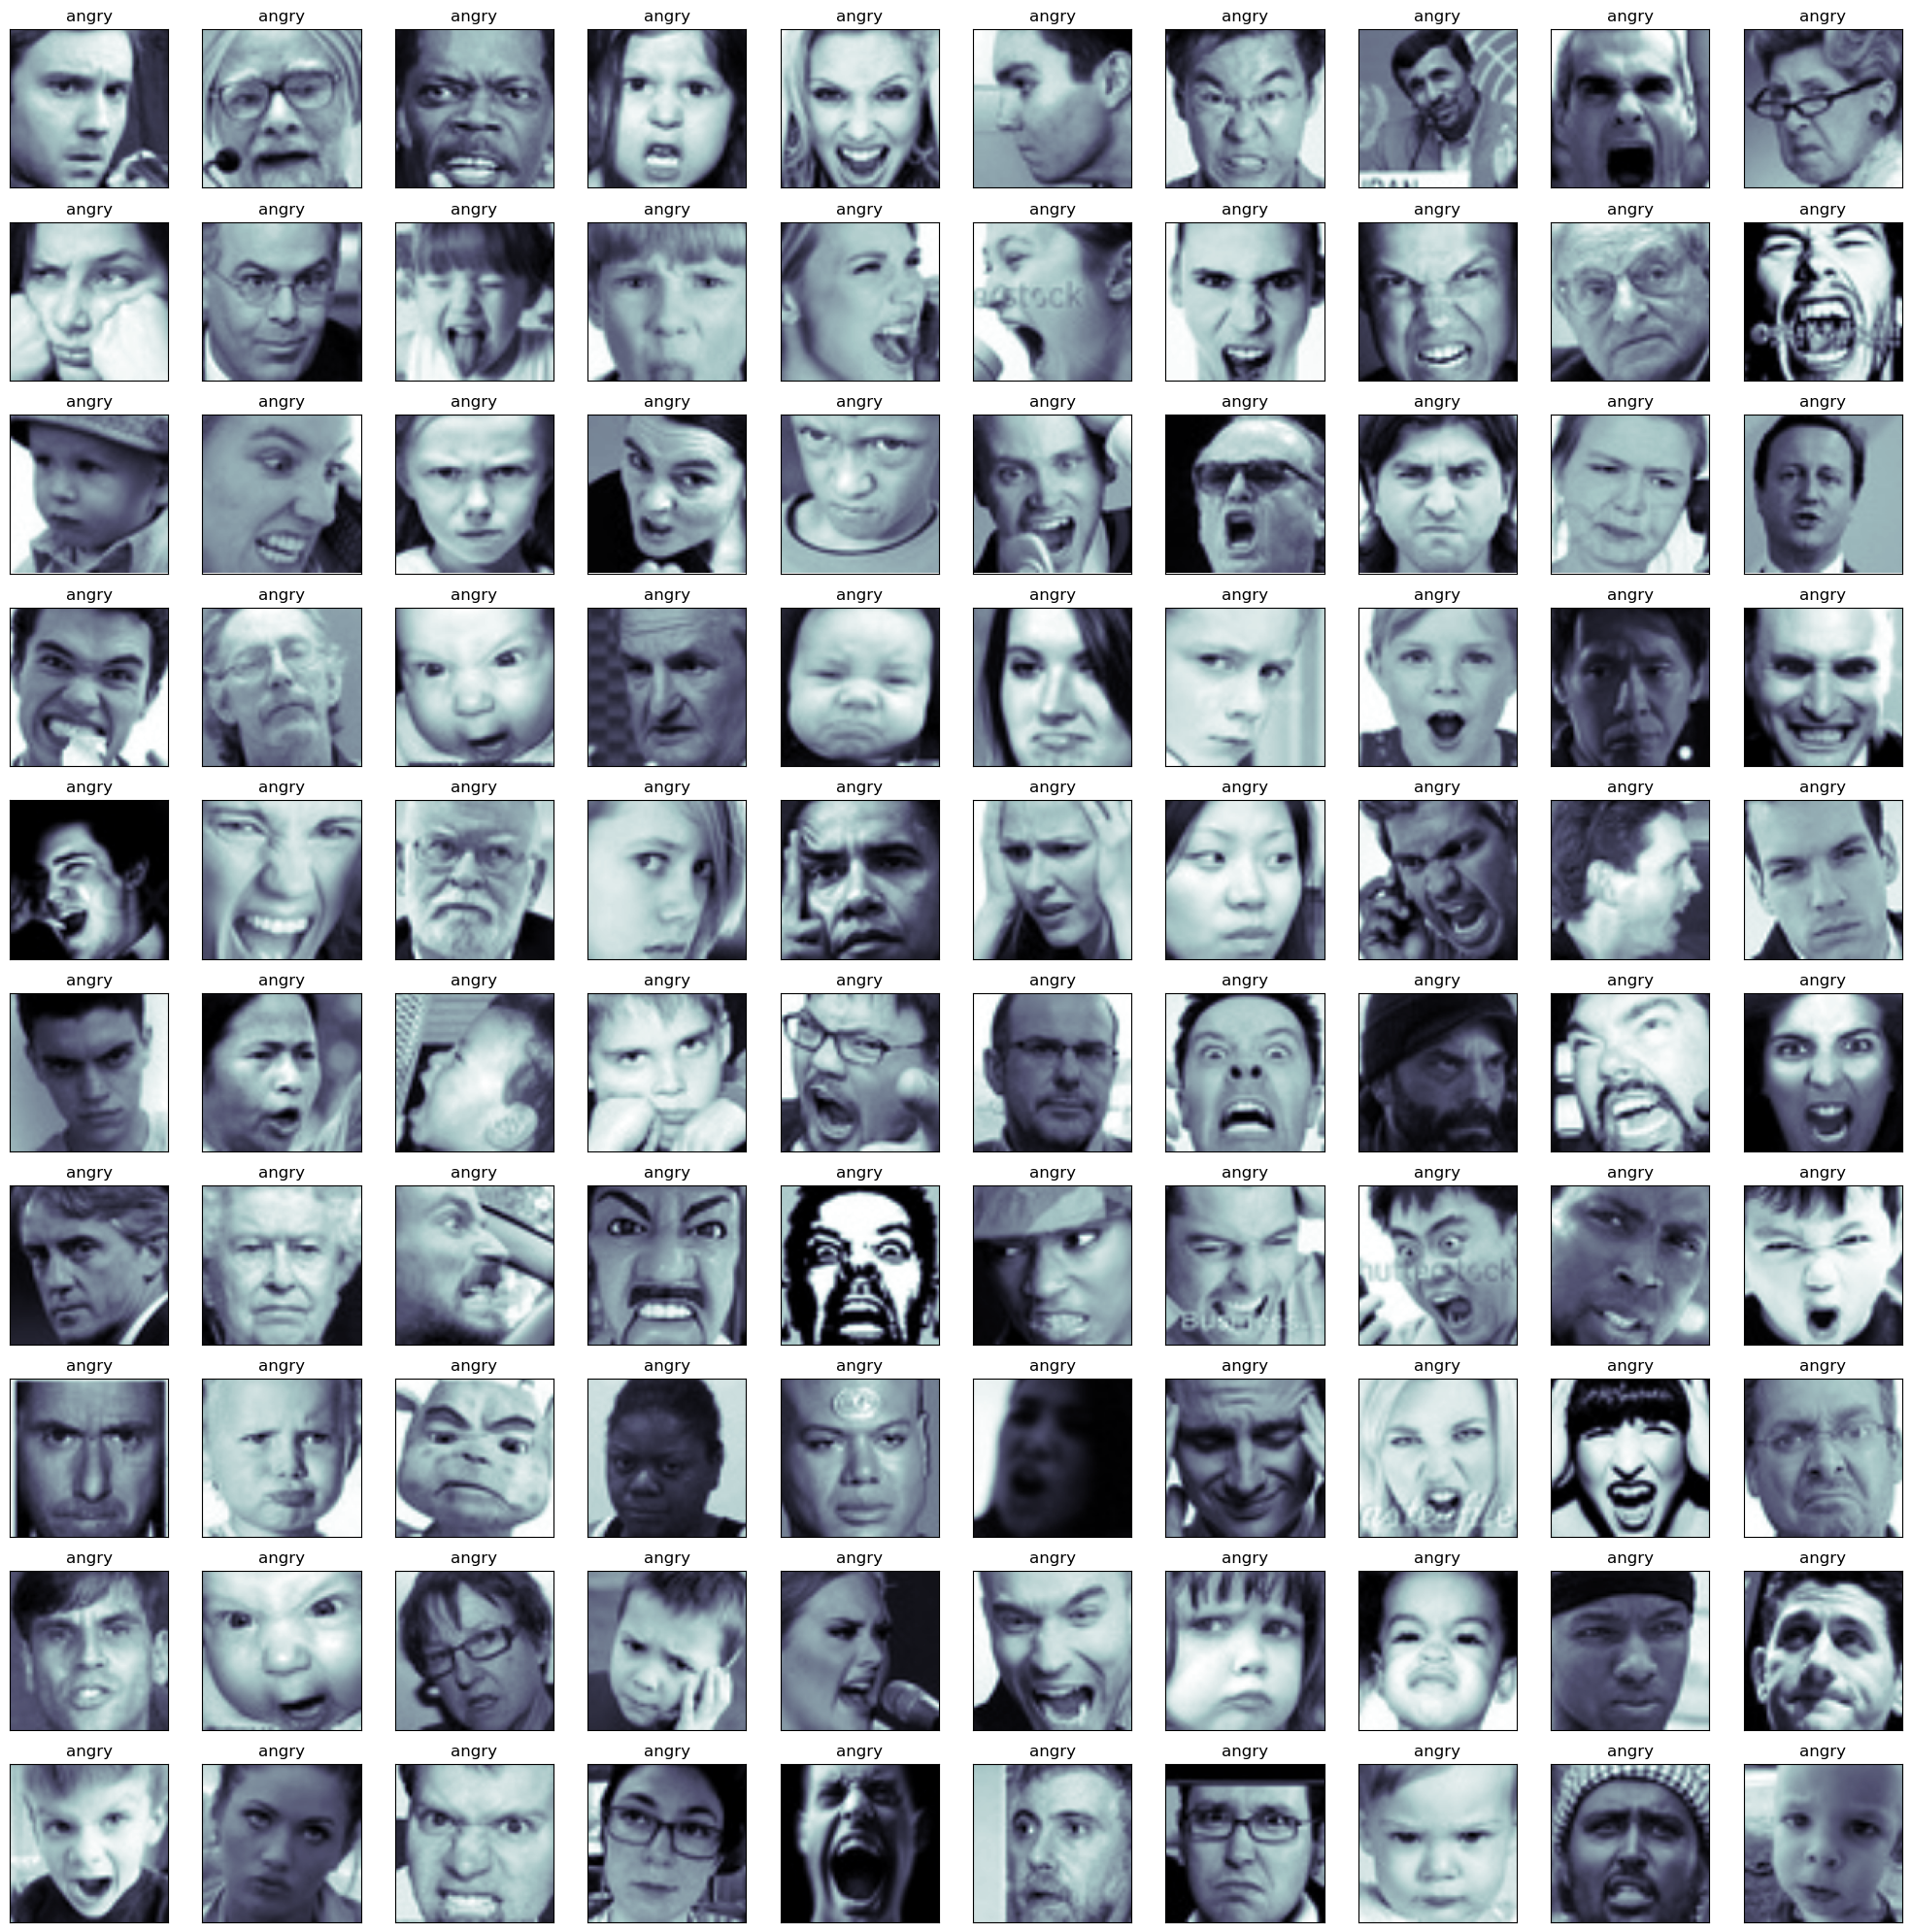

In [9]:
fig = plt.figure(figsize=(20,20))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(train_images[i], cmap=plt.cm.bone)
    ax.set_title(train_labels[i][0])
    
plt.tight_layout()  # Adjust the spacing between subplots for a cleaner layout
plt.show()

In [10]:
X1 = train_images/255.0
X2 = test_images/255.0
X_train = X1.reshape(len(train_images), train_images.shape[1]*train_images.shape[2])
X_test = X2.reshape(len(test_images), test_images.shape[1]*test_images.shape[2])
print(X_train.shape)
print(X_test.shape)

(28965, 10000)
(7066, 10000)


In [11]:
df1 = pd.DataFrame(train_labels, columns = ['labels'])
df1 = pd.get_dummies(data=df1)

df2 = pd.DataFrame(test_labels, columns = ['labels'])
df2 = pd.get_dummies(data=df2)

Y_train = df1.values
Y_test = df2.values
print(Y_train.shape, Y_test.shape)

(28965, 7) (7066, 7)


In [12]:
all_images = np.concatenate((X_train, X_test), axis=0)

In [13]:
pca = IncrementalPCA(165)
pca.fit(all_images)

IncrementalPCA(n_components=165)

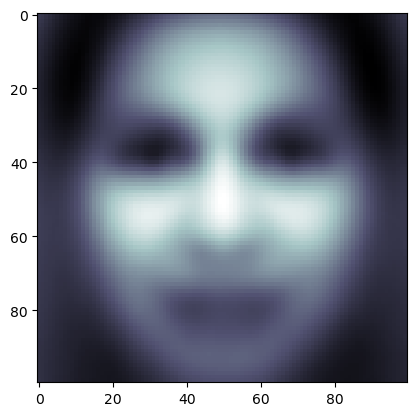

In [14]:
## Mean or Average of all images (most common)
plt.imshow(pca.mean_.reshape(train_images[0].shape), cmap=plt.cm.bone)

In [15]:
print(pca.explained_variance_ratio_.shape)
# print(pca.explained_variance_ratio_[0:100])
# print(np.sum(pca.explained_variance_ratio_[0:165]))
print(np.sum(pca.explained_variance_ratio_))

(165,)
0.9501134946064094


In [16]:
# Eigen vectors
print(pca.components_.T)
print(pca.components_.shape)
# Eigen values
print(pca.explained_variance_)

[[ 0.01147739  0.01604582 -0.00293738 ...  0.02698751  0.00166547
   0.00461785]
 [ 0.01143301  0.01618431 -0.00297344 ...  0.02471104  0.00267778
   0.00485136]
 [ 0.01137853  0.01643459 -0.00311676 ...  0.02027573  0.00528984
   0.00498534]
 ...
 [ 0.01114223  0.00693177  0.01254832 ...  0.01620704  0.02270496
   0.01211284]
 [ 0.0111279   0.00702322  0.01242694 ...  0.01837552  0.02051379
   0.01725761]
 [ 0.01115044  0.00694638  0.01234059 ...  0.01922868  0.02100751
   0.01877666]]
(165, 10000)
[1.78058855e+02 6.09431502e+01 5.78384855e+01 3.37389417e+01
 1.88534745e+01 1.56362279e+01 1.31252726e+01 1.19146512e+01
 1.08714601e+01 9.13551789e+00 7.08335374e+00 6.45277960e+00
 6.22333175e+00 6.01980113e+00 5.61942924e+00 4.95129426e+00
 4.72118619e+00 4.00516151e+00 3.31047461e+00 3.21053152e+00
 3.20102331e+00 3.01694605e+00 2.94126757e+00 2.81559008e+00
 2.66535795e+00 2.48293325e+00 2.46346793e+00 2.27240576e+00
 2.04786534e+00 1.99286565e+00 1.92666527e+00 1.90953745e+00
 1.8383

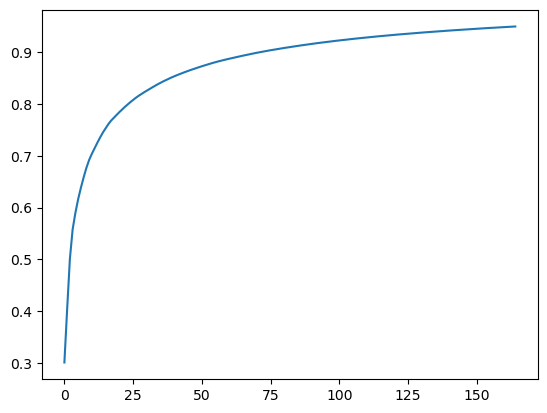

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

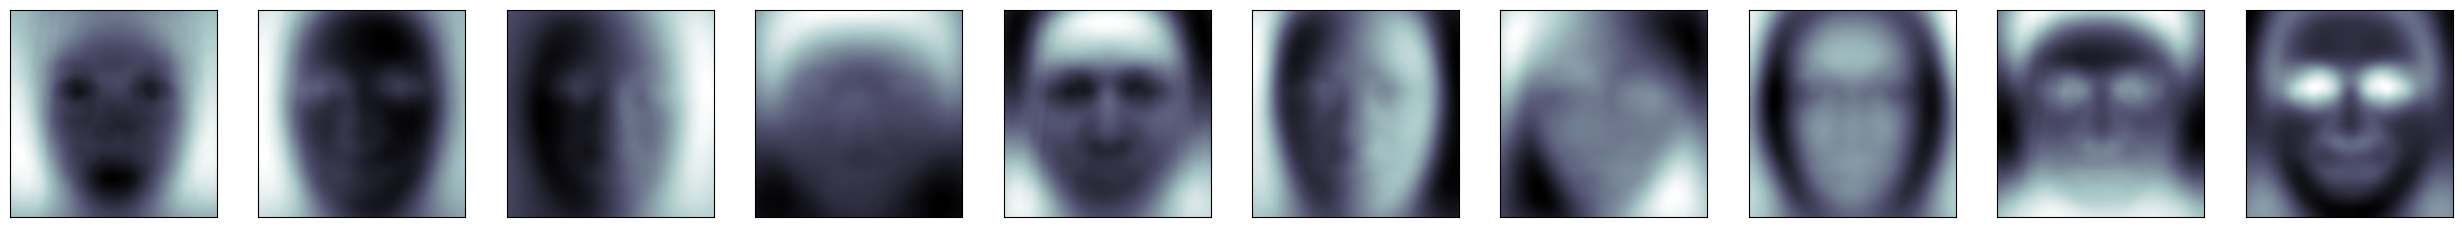

In [18]:
fig = plt.figure(figsize=(320,120))
for i in range(10):
    ax = fig.add_subplot(3, 100, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(train_images[0].shape), cmap=plt.cm.bone)

In [19]:
transformed_images = pca.transform(all_images)
print(transformed_images.shape)

(36031, 165)


(36031, 10000)


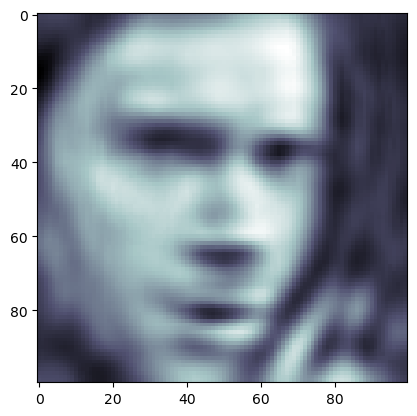

In [20]:
new_images = pca.inverse_transform(transformed_images)
print(new_images.shape)
plt.imshow(new_images[0].reshape(train_images[0].shape), cmap = plt.cm.bone)

In [21]:
X_transformed_train = transformed_images[:len(X_train)]
X_transformed_test = transformed_images[len(X_train):]
print(X_transformed_train.shape, X_transformed_test.shape)

(28965, 165) (7066, 165)


In [22]:
X_new_train = new_images[:len(X_train)]
X_new_test = new_images[len(X_train):]
print(X_new_train.shape, X_new_test.shape)

(28965, 10000) (7066, 10000)


In [23]:
# Number of components (< n_classes - 1)
lda = LDA(n_components=6)
k = lda.fit(X_transformed_train, train_labels)
X_lda = lda.transform(X_transformed_train)
predict = lda.predict(X_transformed_train)
print(confusion_matrix(train_labels, predict))
print(accuracy_score(train_labels, predict))

C:\Users\Suchetan Ghosh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 692    6  307 1345  594  751  322]
 [  43   35   60  140   58   82   38]
 [ 305   33  534 1245  670  742  594]
 [ 278    4  284 4953  560  816  289]
 [ 270    8  274 1488 1780  879  303]
 [ 360   32  351 1445  914 1581  275]
 [ 110   24  256  610  360  263 1602]]
0.38587950975315033


In [24]:
# # Number of components (< n_classes - 1)
# lda2 = LDA(n_components=6, shrinkage='auto', solver='eigen')
# k2 = lda2.fit(X_new_train, train_labels)
# X_lda = lda2.transform(X_new_train)
# predict2 = lda2.predict(X_new_train)
# print(confusion_matrix(train_labels, predict2))
# print(accuracy_score(train_labels, predict2))

In [25]:
# lda = LDA(n_components=6, shrinkage='auto', solver='lsqr')
# k = lda.fit(X_train, train_labels)
# X_lda = lda.transform(X_train)
# predict = lda.predict(X_train)
# print(confusion_matrix(train_labels, predict))
# print(accuracy_score(train_labels, predict))

In [26]:
all_labels = np.concatenate((Y_train, Y_test), axis=0)
all_labels.shape

(36031, 7)

In [216]:
model1=Sequential()
model1.add(Dense(165, activation='tanh'))
model1.add(Dense(132, activation='tanh'))
model1.add(Dense(99, activation='tanh'))
model1.add(Dense(66, activation='tanh'))
model1.add(Dense(33, activation='tanh'))
model1.add(Dense(16, activation='tanh'))
model1.add(Dense(7, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model1.fit(transformed_images, all_labels, epochs=100)

Epoch 1/100
1126/1126 [==============================] - 2s 1ms/step - loss: 1.6546 - accuracy: 0.3536
Epoch 2/100
1126/1126 [==============================] - 1s 1ms/step - loss: 1.5348 - accuracy: 0.4034
Epoch 3/100
1126/1126 [==============================] - 2s 1ms/step - loss: 1.4515 - accuracy: 0.4388
Epoch 4/100
1126/1126 [==============================] - 1s 1ms/step - loss: 1.3746 - accuracy: 0.4765
Epoch 5/100
1126/1126 [==============================] - 1s 1ms/step - loss: 1.2967 - accuracy: 0.5090
Epoch 6/100
1126/1126 [==============================] - 1s 1ms/step - loss: 1.2235 - accuracy: 0.5390
Epoch 7/100
1126/1126 [==============================] - 1s 1ms/step - loss: 1.1478 - accuracy: 0.5713
Epoch 8/100
1126/1126 [==============================] - 2s 1ms/step - loss: 1.0810 - accuracy: 0.6020
Epoch 9/100
1126/1126 [==============================] - 1s 1ms/step - loss: 1.0178 - accuracy: 0.6270
Epoch 10/100
1126/1126 [==============================] - 1s 1ms/step - l

1126/1126 [==============================] - 1s 1ms/step - loss: 0.1933 - accuracy: 0.9355
Epoch 80/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.2024 - accuracy: 0.9338
Epoch 81/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.1973 - accuracy: 0.9331
Epoch 82/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.2023 - accuracy: 0.9339
Epoch 83/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.1915 - accuracy: 0.9366
Epoch 84/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.1987 - accuracy: 0.9344
Epoch 85/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.1895 - accuracy: 0.9379
Epoch 86/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.1900 - accuracy: 0.9375
Epoch 87/100
1126/1126 [==============================] - 1s 1ms/step - loss: 0.1880 - accuracy: 0.9382
Epoch 88/100
1126/1126 [==============================] - 1s 1ms/step - loss:

In [217]:
train_loss, train_accuracy = model1.evaluate(X_transformed_train, Y_train)
test_loss, test_accuracy = model1.evaluate(X_transformed_test, Y_test)
print(train_loss, train_accuracy)
print(test_loss, test_accuracy)

221/221 [==============================] - 0s 919us/step - loss: 0.1240 - accuracy: 0.9602
0.12233574688434601 0.9613326191902161
0.12397084385156631 0.9602320790290833


In [218]:
y_pred = model1.predict(X_transformed_train)
y_pred = (y_pred>0.5).astype(float)
print(confusion_matrix(Y_train.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(Y_train.argmax(axis=1), y_pred.argmax(axis=1), digits=5))
print(accuracy_score(Y_train.argmax(axis=1), y_pred.argmax(axis=1)))

906/906 [==============================] - 1s 812us/step
[[3826    6   38   54   39   49    5]
 [  25  407    2   11    8    2    1]
 [  42    5 3942   26   19   64   25]
 [  69    5   22 6988   39   39   22]
 [  67    2   23   55 4785   57   13]
 [  77    1   53   32   51 4743    1]
 [  25    4   48   25    9   14 3100]]
              precision    recall  f1-score   support

           0    0.92617   0.95245   0.93913      4017
           1    0.94651   0.89254   0.91874       456
           2    0.95494   0.95610   0.95552      4123
           3    0.97177   0.97272   0.97224      7184
           4    0.96667   0.95662   0.96162      5002
           5    0.95471   0.95664   0.95567      4958
           6    0.97884   0.96124   0.96996      3225

    accuracy                        0.95947     28965
   macro avg    0.95709   0.94976   0.95327     28965
weighted avg    0.95964   0.95947   0.95950     28965

0.9594683238391162


In [219]:
y_pred2 = model1.predict(X_transformed_test)
y_pred2 = (y_pred2>0.5).astype(float)
print(confusion_matrix(Y_test.argmax(axis=1), y_pred2.argmax(axis=1)))
print(classification_report(Y_test.argmax(axis=1), y_pred2.argmax(axis=1), digits=5))
print(accuracy_score(Y_test.argmax(axis=1), y_pred2.argmax(axis=1)))

221/221 [==============================] - 0s 866us/step
[[ 905    2   12   14   10   13    4]
 [   7   96    2    4    0    1    1]
 [  15    0  960    6    6   22    9]
 [  14    1    9 1785    6    7    3]
 [  13    0    3   14 1167   14    5]
 [  21    0    9    8   12 1086    3]
 [   9    2    7   10    0    3  766]]
              precision    recall  f1-score   support

           0    0.91972   0.94271   0.93107       960
           1    0.95050   0.86486   0.90566       111
           2    0.95808   0.94303   0.95050      1018
           3    0.96958   0.97808   0.97381      1825
           4    0.97169   0.95970   0.96566      1216
           5    0.94764   0.95347   0.95055      1139
           6    0.96839   0.96110   0.96474       797

    accuracy                        0.95740      7066
   macro avg    0.95509   0.94328   0.94885      7066
weighted avg    0.95754   0.95740   0.95740      7066

0.957401641664308


In [185]:
# y_pred3 = model.predict(X_train)
# y_pred3 = (y_pred3>0.5).astype(float)
# print(confusion_matrix(Y_train.argmax(axis=1), y_pred3.argmax(axis=1)))
# print(classification_report(Y_train.argmax(axis=1), y_pred3.argmax(axis=1), digits=5))
# print(accuracy_score(Y_train.argmax(axis=1), y_pred3.argmax(axis=1)))

In [186]:
img = cv2.imread("D:/Suchi NMIMS/Year 3/Sem 5/FOML/Face Check Images/1.jpg",0)
img = cv2.resize(img, (100, 100))
img2 = img/255.0
img3 = img2.reshape(1, img.shape[0]*train_images.shape[1])
new_img = pca.transform(img3)
new_img.shape

(1, 165)

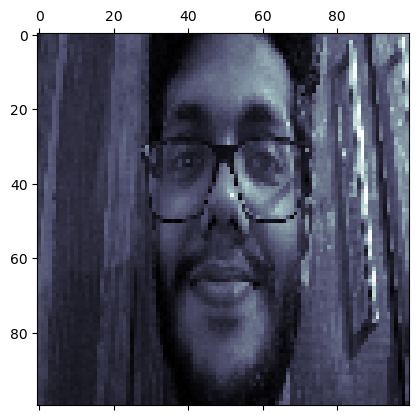

In [187]:
plt.matshow(img, cmap = plt.cm.bone)

In [188]:
y_new_pred = model1.predict(new_img)
y_new_pred2 = (y_new_pred>0.5).astype(float)
print(y_new_pred)
print(y_new_pred2)
print(np.argmax(y_new_pred2))

1/1 [==============================] - 0s 22ms/step
[[7.7069366e-05 3.7215323e-05 3.3402905e-08 9.9978596e-01 3.7149593e-06
  1.0340970e-08 9.6020362e-05]]
[[0. 0. 0. 1. 0. 0. 0.]]
3


In [189]:
img = cv2.imread("D:/Suchi NMIMS/Year 3/Sem 5/FOML/Face Check Images/2.jpg",0)
img = cv2.resize(img, (100, 100))
img2 = img/255.0
img3 = img2.reshape(img.shape[0]*train_images.shape[1])
img3 = img3.reshape(1, -1)
new_img = pca.transform(img3)
y_new_pred = model1.predict(new_img)
y_new_pred2 = (y_new_pred>0.5).astype(float)
print(y_new_pred)
print(y_new_pred2)
print(np.argmax(y_new_pred2))

1/1 [==============================] - 0s 9ms/step
[[9.9986577e-01 7.2987866e-08 3.0492247e-06 1.1145801e-04 8.0543680e-07
  1.6009830e-05 2.7046235e-06]]
[[1. 0. 0. 0. 0. 0. 0.]]
0


In [190]:
try_img = new_img.flatten()
print(new_img.shape, try_img.shape)
print(try_img)

(1, 165) (165,)
[-2.20157986e+01  8.67670521e+00  1.09481758e+01  1.12691217e+00
 -4.66101530e+00 -3.80442257e+00 -9.26264450e-01  3.90030215e+00
 -1.77382130e+00  2.09386595e+00  1.63272998e+00  5.06152097e-01
 -3.67673941e+00 -6.52250830e-01 -2.17587078e+00  1.89128098e+00
 -8.54873588e-02  2.08836104e-01  1.50763159e+00 -2.79480933e-01
 -1.00640698e+00  1.20653612e+00  5.15313760e-01 -5.84342165e-01
 -1.21174810e-01 -3.55536543e-01  4.98174318e+00 -5.33495164e-01
 -1.40689691e+00  8.70531450e-01 -6.54641358e-02  4.81262383e-01
 -2.40796560e+00  1.18385972e+00 -1.28879316e-01  1.22833911e+00
 -3.29882950e-01  4.81992799e-01  8.69164816e-01 -7.08676160e-01
  6.62645308e-01 -1.50648302e-01 -1.76139877e-01  2.66257847e-01
  1.81487445e+00 -6.41951751e-01  6.86898530e-01 -5.68645282e-01
  8.79030493e-01 -5.27267575e-01 -1.65922323e+00  3.00521786e-01
  9.87596157e-01 -1.82271047e+00  4.20331916e-01 -9.98652269e-01
  6.56878387e-01  1.06618305e+00  1.36923299e-01 -9.21860940e-01
  9.80415

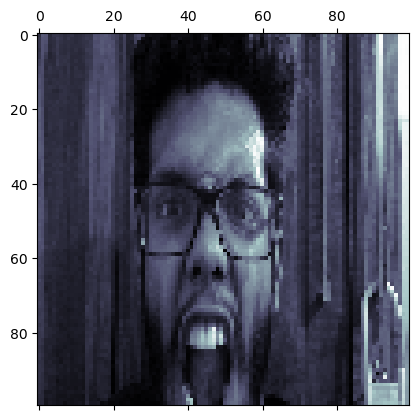

In [191]:
plt.matshow(img, cmap = plt.cm.bone)

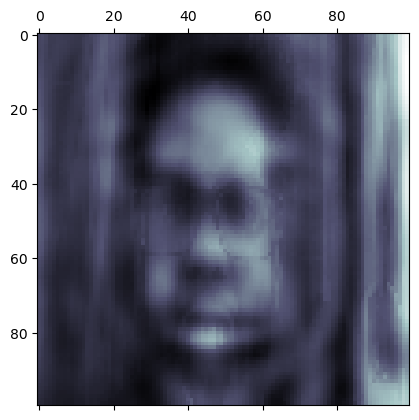

In [192]:
pca_image = pca.inverse_transform(new_img)
plt.matshow(pca_image.reshape(img.shape), cmap = plt.cm.bone)

In [210]:
img = cv2.imread("D:/Suchi NMIMS/Year 3/Sem 5/FOML/Face Check Images/3.jpg",0)
img = cv2.resize(img, (100, 100))
img2 = img/255.0
img3 = img2.reshape(1, img.shape[0]*img.shape[1])
new_img = pca.transform(img3)
y_new_pred = model1.predict(new_img)
y_new_pred2 = (y_new_pred>0.5).astype(float)
print(y_new_pred)
print(y_new_pred2)
print(np.argmax(y_new_pred))

1/1 [==============================] - 0s 10ms/step
[[2.4119962e-02 1.0214195e-05 5.7214298e-03 5.9566981e-01 3.7352493e-01
  6.7410385e-04 2.7957206e-04]]
[[0. 0. 0. 1. 0. 0. 0.]]
3


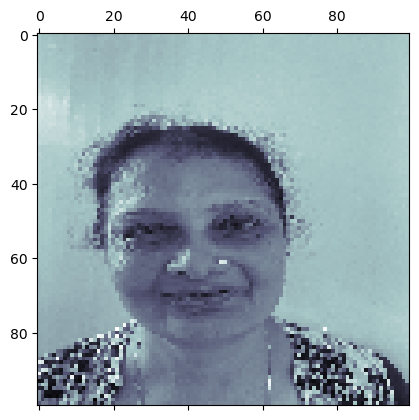

In [212]:
plt.matshow(img, cmap = plt.cm.bone)

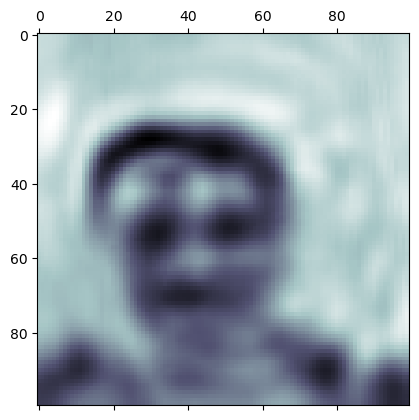

In [211]:
pca_image = pca.inverse_transform(new_img)
plt.matshow(pca_image.reshape(img.shape), cmap = plt.cm.bone)

In [41]:
new_img.shape

(1, 165)

In [213]:
# model1.save('ExModel')
# import pickle
# with open('exp_pca.pkl', 'wb') as pickle_file:
#     pickle.dump(pca, pickle_file)

INFO:tensorflow:Assets written to: ExModel\assets


INFO:tensorflow:Assets written to: ExModel\assets
